In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv("./data/aug_train.csv")
df_test = pd.read_csv("./data/aug_test.csv")

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [202]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [203]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [204]:
df_test['major_discipline'].value_counts()

STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

# Preprocessing of the data will be performed in the below order

## 1. Check for Duplicates and remove if any 
## 2. Check for missing values and handle the missing values with below methods 
    a. Imputaion with mean and mode for numerical and categorical values
    b. KNN model
## 3. Taking care of categorical variables with the below common ways 
    a. Label Encoding
    b. One Hot Encoding 
## 4. Normalisation of data Set if needed
## 5. graphical representation of the below
        a. trend of data in each feature - visualise count plots
        b. Visualise unique values
        c. distribution of data in each feature
        d. Removing any outliers 
        e. identify natural clusters 
## 6. Check if a feature is a significant predictor - Feature Matrix Selection  

In [205]:
# checking for duplicates 

df.duplicated().count()

19158

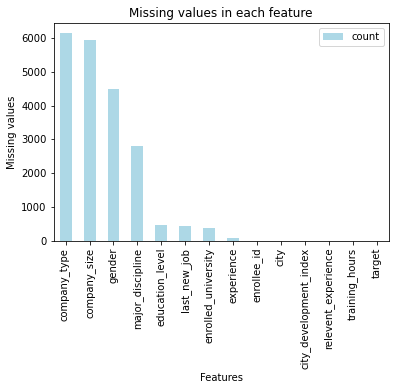

In [311]:
# check for Null Values or missig values in data
# plot for missing values in data

df.isna().sum().reset_index(name ='count').sort_values('count',ascending=False).plot.bar(x='index',y ='count', rot = 90, color = 'lightblue') # plot the missing values against the features in data

plt.xlabel('Features')  # x- axis label
plt.ylabel('Missing values')  #  # y- axis label
plt.title('Missing values in each feature')  #  tile for the graph
plt.show()

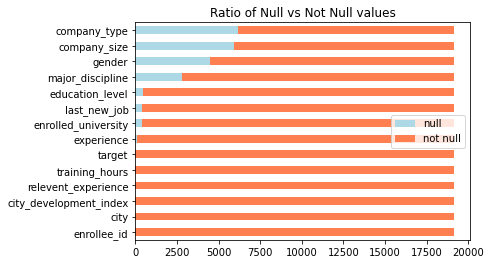

In [310]:
# plotting a ratio of null values to not null values 

datanull = df.isnull().sum()    # calulate null values
datanotnull = df.notnull().sum()# calulate not null values
df_stacked= pd.DataFrame({'null': datanull,
                          'not null': datanotnull}, index=df.columns)  # save this data in a data frame 

df_stacked.sort_values('null').plot(kind='barh', stacked=True, color =['lightblue','coral'],title = 'Ratio of Null vs Not Null values');  # plot a stacked graph 


plt.show()

# List of features with Missing values in descending order

1. Company type
2. Company Size
3. Gender
4. Major discipline 
5. education level
6. last new job 
7. enrolled university 


## a. Imputaion with mean and mode for numerical and categorical values

## b. KNN model

# 5. graphical representation of the below

        a. trend of data in each feature - visualise count plots
        b. Visualise unique values
        c. distribution of data in each feature
        d. Removing any outliers 
        e. identify natural clusters


## a. Trend of data in each feature - Visualise count plots

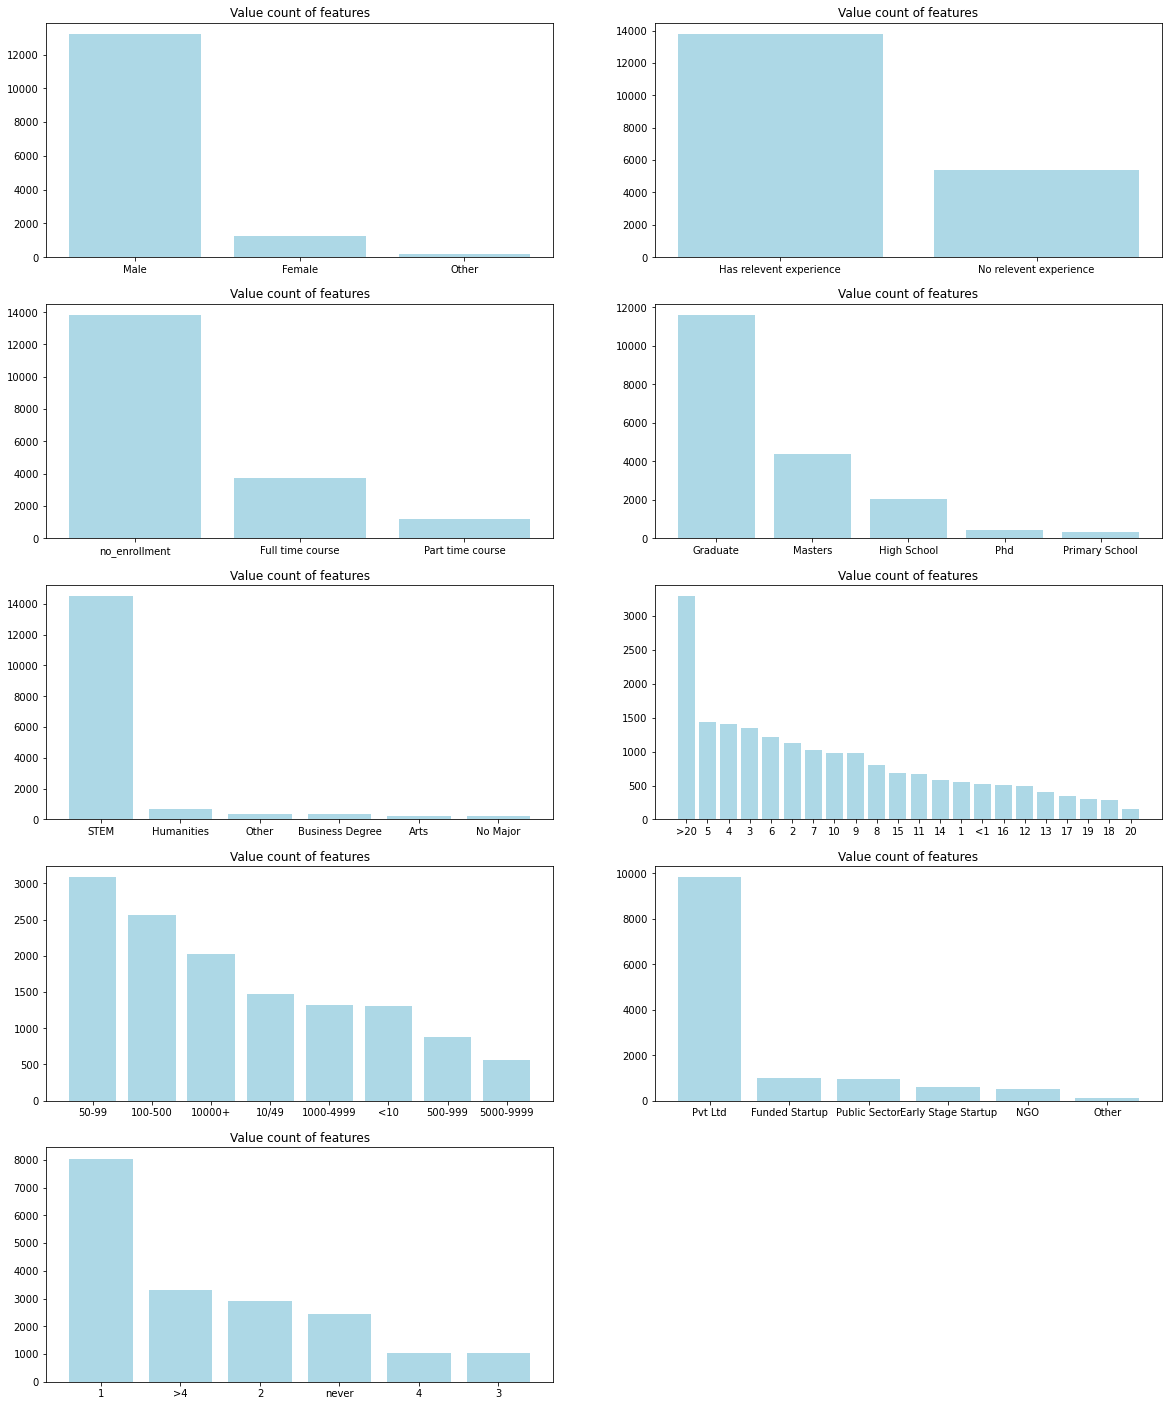

In [345]:
# 
plt.figure(figsize = (20, 25))
feature_list = ['gender','relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

for i in range(9):
    plt.subplot(5,2,i+1)  
    data = pd.DataFrame(df[feature_list[i]].value_counts().reset_index(name ='count'))
    plt.bar(data['index'],data['count'],color = 'lightblue' )
    plt.title ('Value count of features')

plt.show()

## b. Visualise unique values


In [352]:
df['gender'].unique

<bound method Series.unique of 0        Male
1        Male
2         NaN
3         NaN
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157     NaN
Name: gender, Length: 19158, dtype: object>

<Figure size 2880x504 with 0 Axes>

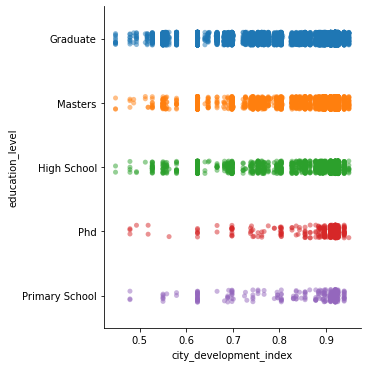

In [351]:
plt.figure(figsize = (40,7))

import seaborn as sns
sns.catplot(x="city_development_index", y="education_level", data=df, alpha = 0.5)
plt.show()